# Web Scrapping

In [85]:

from bs4 import BeautifulSoup
import requests


r = requests.get("http://tikili.az/elan-search.php?dil=az&realtor=0&emlak_type=menzil&elan_type=satish&region=no_select&location=no_select&metro=0&oda_sayi=0&min_sahe=0&max_sahe=0&invertar=0&min_price=0&max_price=0&user-type=no_select&searchmod=3")
soup = BeautifulSoup(r.content, "lxml")

houses = soup.find_all("li", {"class": "position-relativec"})

headers = []
values = []

for house in houses:
    house_link = house.find_all("a")
    link_basi = "http://tikili.az/"

    for link in house_link:
        link_all = link_basi+link.get("href")

        # print(link_all)

        detail = requests.get(link_all)
        # print(detail.status_code)

        detail_soup = BeautifulSoup(detail.content, "lxml")

        parameters = detail_soup.find_all("table", {"class": "elan-params-1"})

        for detail in parameters:
            tr = detail.find_all("tr")

            for i in tr:
                headers.append(i.find_all("td")[0].text)

            for k in tr:
                values.append(k.find_all("td")[1].text)


headers = list(dict.fromkeys(headers))
headers = headers[0:16]


In [86]:
import pandas as pd
rows = [values[i:i + len(headers)]
        for i in range(0, len(values), len(headers))]

df = pd.DataFrame(data=rows, columns=headers)

df = df.drop(["Elan nömrəsi:","Yerləşdirilib:","MTK:","Yerləşdiyi ərazi:","Ünvan:","Yaxınlıqdakı metro:","Qiyməti $-la:"],axis=1)

df

,Elan növü:,Sahəsi:,Təmiri:,Mərtəbəsi:,Otaq sayı:,Binada qaz:,Sənədi:,Qiyməti AZN-lə:,Rayon:
0,Yeni bina,93 m2,Super təmir,14 / 3,3,Var,Çıxarış(kupça),210 000,Nəsimi r.
1,Yeni bina,98 m2,Yaxşı təmir,16 / 3,3,Var,Çıxarış(kupça),167 000,Nəsimi r.
2,Yeni bina,180 m2,Yaxşı təmir,16 / 13,4,Var,Çıxarış(kupça),310 000,Nəsimi r.
3,Yeni bina,90 m2,Təmirsiz,16 / 3,3,Var,Müqavilə,160 000,Nəsimi r.
4,Yeni bina,49 m2,Super təmir,16 / 6,2,Var,Müqavilə,50 000,Yasamal r.
...,...,...,...,...,...,...,...,...,...
59,Köhnə bina,87 m2,Yaxşı təmir,5 / 1,3,Birlikdə,Çıxarış(kupça),103 000,Nərimanov r.
60,Yeni bina,172 m2,Suvaqla,18 / 6,3,Yoxdur,Müqavilə,258 000,Nəsimi r.
61,Yeni bina,158 m2,Orta təmir,16 / 8,3,Var,Çıxarış(kupça),240 000,Nəsimi r.
62,Köhnə bina,42 m2,Yaxşı təmir,1 / 1,2,Birlikdə,Çıxarış(kupça),50 000,Nəsimi r.


# Data Processing

In [87]:
df.rename(columns={'Elan növü:': 'Bina_novu',
                   'Sahəsi:': 'Sahesi',
                    'Təmiri:':'Temiri',
                   'Mərtəbəsi:' : 'Mertebesi',
                   'Otaq sayı:' : 'Otag_sayi',
                   'Binada qaz:' : 'Binada_gaz',
                   'Sənədi:' : 'Senedi',
                   'Qiyməti AZN-lə:' : 'Qiymeti(AZN)',
                   'Rayon:' : 'Rayon'                 
                  },
          inplace=True, errors='raise')



In [88]:
#create new column
df["Bina_mertebe_sayi "] = df["Mertebesi"].apply(lambda x: x.split(" /")[0])

In [89]:
df["Sahesi"] = df["Sahesi"].apply(lambda x:x.replace("m2" , ""))
df["Mertebesi"] = df["Mertebesi"].apply(lambda x: x[-1])



In [90]:
#standardize column names
df.columns = (df.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))

C:\Users\EYYUBM~1\AppData\Local\Temp/ipykernel_3500/4180421914.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = (df.columns.str.strip().str.upper()


In [91]:
columns = ['BINA_NOVU', 'SAHESI', 'TEMIRI', 'MERTEBESI',  'BINA_MERTEBE_SAYI','OTAG_SAYI', 'BINADA_GAZ',
       'SENEDI', 'RAYON','QIYMETIAZN']

df = df.reindex(columns = columns)


In [92]:
df["QIYMETIAZN"] = df["QIYMETIAZN"].apply(lambda x:x.replace(" ", ""))

In [93]:
# change column's types

df["SAHESI"] = df["SAHESI"].astype("float")
df["MERTEBESI"] = df["MERTEBESI"].astype("float")
df["BINA_MERTEBE_SAYI"] = df["BINA_MERTEBE_SAYI"].astype("float")
df["OTAG_SAYI"] = df["OTAG_SAYI"].astype("float")
df["QIYMETIAZN"] = df["QIYMETIAZN"].astype("float")

### Label Encoding

In [112]:

data = df.copy()
data


,BINA_NOVU,SAHESI,TEMIRI,MERTEBESI,BINA_MERTEBE_SAYI,OTAG_SAYI,BINADA_GAZ,SENEDI,RAYON,QIYMETIAZN
0,Yeni bina,93.0,Super təmir,3.0,14.0,3.0,Var,Çıxarış(kupça),Nəsimi r.,210000.0
1,Yeni bina,98.0,Yaxşı təmir,3.0,16.0,3.0,Var,Çıxarış(kupça),Nəsimi r.,167000.0
2,Yeni bina,180.0,Yaxşı təmir,3.0,16.0,4.0,Var,Çıxarış(kupça),Nəsimi r.,310000.0
3,Yeni bina,90.0,Təmirsiz,3.0,16.0,3.0,Var,Müqavilə,Nəsimi r.,160000.0
4,Yeni bina,49.0,Super təmir,6.0,16.0,2.0,Var,Müqavilə,Yasamal r.,50000.0
...,...,...,...,...,...,...,...,...,...,...
59,Köhnə bina,87.0,Yaxşı təmir,1.0,5.0,3.0,Birlikdə,Çıxarış(kupça),Nərimanov r.,103000.0
60,Yeni bina,172.0,Suvaqla,6.0,18.0,3.0,Yoxdur,Müqavilə,Nəsimi r.,258000.0
61,Yeni bina,158.0,Orta təmir,8.0,16.0,3.0,Var,Çıxarış(kupça),Nəsimi r.,240000.0
62,Köhnə bina,42.0,Yaxşı təmir,1.0,1.0,2.0,Birlikdə,Çıxarış(kupça),Nəsimi r.,50000.0


In [95]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [96]:
data["BINA_NOVU"] = encoder.fit_transform(data["BINA_NOVU"])
encoder.classes_

# Kohne Bina : 0 
# Yeni Bina : 1

array(['Köhnə bina', 'Yeni bina'], dtype=object)

In [97]:
data["TEMIRI"] = encoder.fit_transform(data["TEMIRI"])
encoder.classes_

# Orta təmir : 0
# Super təmir : 1 
# Suvaqla : 2 
# Təmirsiz : 3
# Yaxşı təmir : 4


array(['Orta təmir', 'Super təmir', 'Suvaqla', 'Təmirsiz', 'Yaxşı təmir'],
      dtype=object)

In [98]:
data["BINADA_GAZ"] = encoder.fit_transform(data["BINADA_GAZ"])
encoder.classes_

# Ayrı-ayrı : 0
# Birlikdə: 1
# Var : 2
# Yoxdur : 3

array(['Ayrı-ayrı', 'Birlikdə', 'Var', 'Yoxdur'], dtype=object)

In [99]:
data["SENEDI"] = encoder.fit_transform(data["SENEDI"])
encoder.classes_

# Müqavilə : 0
# Çıxarış(kupça) :1

array(['Müqavilə', 'Çıxarış(kupça)'], dtype=object)

In [100]:
data["RAYON"] = encoder.fit_transform(data["RAYON"])
encoder.classes_

# Abşeron r. : 0 
# Binəqədi r. : 1
# Nərimanov r. : 2
# Nəsimi r. : 3
# Xətai r. : 4
# Xəzər r. : 5
# Yasamal r. : 6

array(['Abşeron r.', 'Binəqədi r.', 'Nizami r.', 'Nərimanov r.',
       'Nəsimi r.', 'Xətai r.', 'Xəzər r.', 'Yasamal r.'], dtype=object)

### Outliers

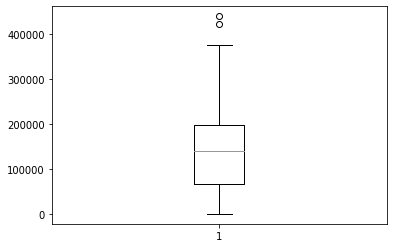

In [101]:
# Import matplotlib
import matplotlib.pyplot as plt


plt.boxplot(data["QIYMETIAZN"])
plt.show()

In [102]:

Q1 = data["QIYMETIAZN"].quantile(0.25)
Q3 = data["QIYMETIAZN"].quantile(0.75)
IQR = Q3 - Q1

data.shape

(64, 10)

In [103]:
data = data[~pd.DataFrame(((data["QIYMETIAZN"] < (Q1 - 1.5 * IQR)) |(data["QIYMETIAZN"] > (Q3 + 1.5 * IQR)))).any(axis=1)]
data.shape

(62, 10)

# ML Model

In [104]:
y = data["QIYMETIAZN"]
X = data.drop(["QIYMETIAZN"],axis=1)
data

,BINA_NOVU,SAHESI,TEMIRI,MERTEBESI,BINA_MERTEBE_SAYI,OTAG_SAYI,BINADA_GAZ,SENEDI,RAYON,QIYMETIAZN
0,1,93.0,1,3.0,14.0,3.0,2,1,4,210000.0
1,1,98.0,4,3.0,16.0,3.0,2,1,4,167000.0
2,1,180.0,4,3.0,16.0,4.0,2,1,4,310000.0
3,1,90.0,3,3.0,16.0,3.0,2,0,4,160000.0
4,1,49.0,1,6.0,16.0,2.0,2,0,7,50000.0
...,...,...,...,...,...,...,...,...,...,...
59,0,87.0,4,1.0,5.0,3.0,1,1,3,103000.0
60,1,172.0,2,6.0,18.0,3.0,3,0,4,258000.0
61,1,158.0,0,8.0,16.0,3.0,2,1,4,240000.0
62,0,42.0,4,1.0,1.0,2.0,1,1,4,50000.0


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X.values, y.values, test_size=0.33, random_state=42)

In [106]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

xgb = XGBRegressor()
print(xgb)

model = xgb.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


In [107]:
model.score(X_test,y_test)

0.8626509559240061

### Model Tuning

In [108]:
index = [i for i in range(4,11)]

for i in index:
    scores = cross_val_score(xgb, X_train, y_train, cv=i)
    print(f"Mean cross-validation score:{round(scores.mean(),2)} , for {i} index")
    

Mean cross-validation score:0.57 , for 4 index
Mean cross-validation score:0.63 , for 5 index
Mean cross-validation score:0.55 , for 6 index
Mean cross-validation score:0.6 , for 7 index
Mean cross-validation score:0.63 , for 8 index
Mean cross-validation score:0.15 , for 9 index
Mean cross-validation score:0.29 , for 10 index


In [109]:
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 8,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 8 folds for each of 9 candidates, totalling 72 fits
[17:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.7322426101876854
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'silent': 1, 'subsample': 0.7}


### Best Model

In [62]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, learning_rate= 0.05, max_depth= 5, 
                         min_child_weight= 4, n_estimators= 500, 
                         nthread= 4, silent= 1, subsample= 0.7)

xgb_best_model = xgb_best.fit(X_train,y_train)

[17:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [111]:
xgb_best_model.score(X_test,y_test)

0.873681232205283

In [113]:
# xgb_best_model.predict(X_test[0:10])

xgb_best_model.predict([[0,45,0,5,5,2,2,1,6]])


array([79279.195], dtype=float32)